In [124]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List

In [125]:
def objective(x):
    return x**2.0

In [126]:
# defind range for input
r_min, r_max = -1.0, 1.0
# sample input range uniformly at 0.1 increments
inputs = np.linspace(r_min, r_max, 30)
# Compute targets
results = objective(inputs)

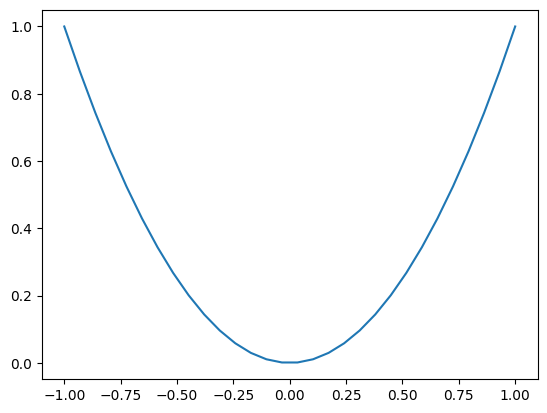

In [127]:
plt.plot(inputs, results)

In [128]:
def derivative(x):
    return 2 * x

# 1. Gradient descent

In [129]:
def gradient_descent(objective, derivative, bounds, n_iter, step_size):
    solutions, scores = [], []
    solution = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    for i in range(n_iter):
        gradient = derivative(solution)
        solution = solution - step_size * gradient
        solution_eval = objective(solution)
        solutions.append(solution)
        scores.append(solution_eval)
        print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
    return [solutions, scores]

In [130]:
np.random.seed(4)
bounds = np.array([[-1, 1]])
n_iter = 30
step_size = 0.1
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size)

>0 f([0.74724774]) = 0.55838
>1 f([0.59779819]) = 0.35736
>2 f([0.47823856]) = 0.22871
>3 f([0.38259084]) = 0.14638
>4 f([0.30607268]) = 0.09368
>5 f([0.24485814]) = 0.05996
>6 f([0.19588651]) = 0.03837
>7 f([0.15670921]) = 0.02456
>8 f([0.12536737]) = 0.01572
>9 f([0.10029389]) = 0.01006
>10 f([0.08023512]) = 0.00644
>11 f([0.06418809]) = 0.00412
>12 f([0.05135047]) = 0.00264
>13 f([0.04108038]) = 0.00169
>14 f([0.0328643]) = 0.00108
>15 f([0.02629144]) = 0.00069
>16 f([0.02103315]) = 0.00044
>17 f([0.01682652]) = 0.00028
>18 f([0.01346122]) = 0.00018
>19 f([0.01076897]) = 0.00012
>20 f([0.00861518]) = 0.00007
>21 f([0.00689214]) = 0.00005
>22 f([0.00551372]) = 0.00003
>23 f([0.00441097]) = 0.00002
>24 f([0.00352878]) = 0.00001
>25 f([0.00282302]) = 0.00001
>26 f([0.00225842]) = 0.00001
>27 f([0.00180673]) = 0.00000
>28 f([0.00144539]) = 0.00000
>29 f([0.00115631]) = 0.00000


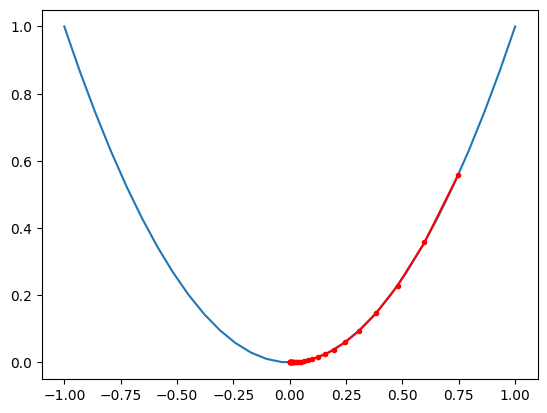

In [131]:
inputs = np.linspace(r_min, r_max, 30)
results = objective(inputs)
plt.plot(inputs, results)
plt.plot(solutions, scores, '.-', color='red')

# 2. Gradient descent with momentum

In [132]:
def gradient_descent(objective, derivative, n_iter, step_size, momentum):
    solutions, scores = [], []
    solution = np.random.rand()
    v = 0
    for i in range(n_iter):
        gradient = derivative(solution)
        v = momentum * v + step_size * gradient
        solution = solution - v
        solution_eval = objective(solution)
        
        solutions.append(solution)
        scores.append(solution_eval)
        
        print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
    return [solutions, scores]

In [133]:
np.random.seed(4)
n_iter = 30
step_size = 0.1
solutions, scores = gradient_descent(objective, derivative, n_iter, step_size, momentum=0.3)

>0 f(0.7736238712109413) = 0.59849
>1 f(0.5608773066279324) = 0.31458
>2 f(0.38487787592744327) = 0.14813
>3 f(0.2551024715318079) = 0.06508
>4 f(0.16514935590675567) = 0.02727
>5 f(0.10513355003788888) = 0.01105
>6 f(0.06610209826965106) = 0.00437
>7 f(0.041172243085249506) = 0.00170
>8 f(0.02545883791287914) = 0.00065
>9 f(0.0156530487785922) = 0.00025
>10 f(0.009580702282587679) = 0.00009
>11 f(0.005842857877268787) = 0.00003
>12 f(0.0035529329802193622) = 0.00001
>13 f(0.002155368915060662) = 0.00000
>14 f(0.0013050259125009197) = 0.00000
>15 f(0.0007889178292328129) = 0.00000
>16 f(0.00047630183840581834) = 0.00000
>17 f(0.00028725667347655626) = 0.00000
>18 f(0.0001730917893024664) = 0.00000
>19 f(0.00010422396618974617) = 0.00000
>20 f(6.271882601798085e-05) = 0.00000
>21 f(3.772351876285509e-05) = 0.00000
>22 f(2.2680222833746345e-05) = 0.00000
>23 f(1.3631189488264452e-05) = 0.00000
>24 f(8.190241586966994e-06) = 0.00000
>25 f(4.919908899184358e-06) = 0.00000
>26 f(2.954827313

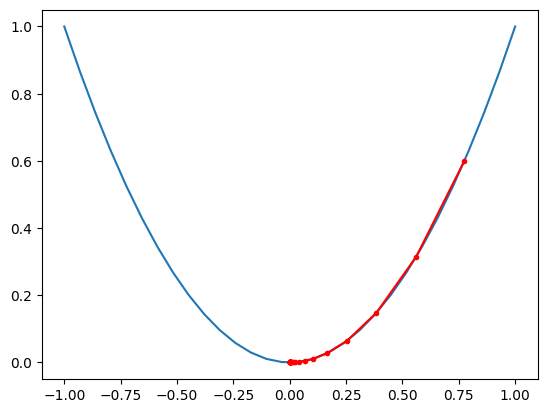

In [134]:
inputs = np.linspace(r_min, r_max, 30)
results = objective(inputs)
plt.plot(inputs, results)
plt.plot(solutions, scores, '.-', color='red')

# 3. Gradient descent with AdaGrad

In [135]:
def objective(x, y):
    return x**2 + y**2

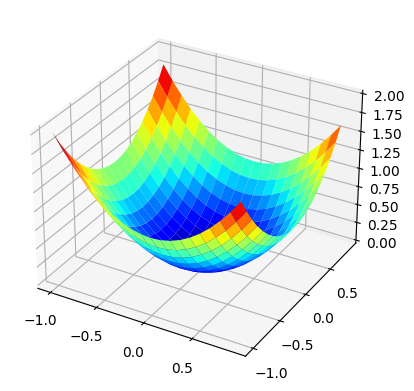

In [136]:
# 3d plot of the test function
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot

# define range for input
r_min, r_max = -1.0, 1.0

# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)

# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a surface plot with the jet color scheme
figure = pyplot.figure()
axis = figure.add_subplot(projection = '3d')
axis.plot_surface(x, y, results, cmap='jet')
# show the plot
pyplot.show()

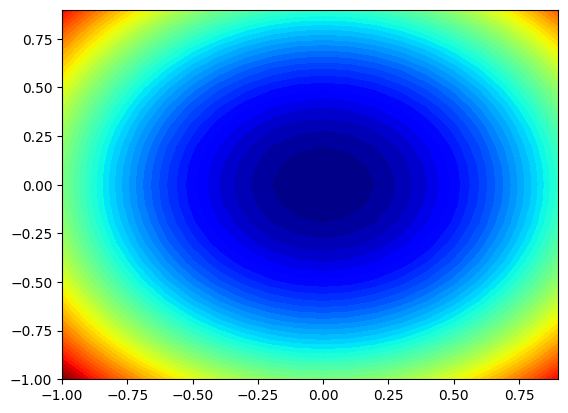

In [137]:
# contour plot of the test function
from numpy import asarray
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot
 
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])

# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)

# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# show the plot
pyplot.show()

In [138]:
def derivative(x, y):
    return np.array([2 * x, 2 * y])

In [139]:
def adagrad(objective, derivative, bounds, n_iter, step_size):
    solutions = []
    solution = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    sq_grad_sums = [0.0 for _ in range(bounds.shape[0])]
    for it in range(n_iter):
        gradient = derivative(solution[0], solution[1])
        for i in range(gradient.shape[0]):
            sq_grad_sums[i] += gradient[i]**2
        new_solution = []
        for i in range(solution.shape[0]):
            alpha = step_size / (1e-8 + np.sqrt(sq_grad_sums[i]))
            value = solution[i] - alpha * gradient[i]
            new_solution.append(value)
        solution = np.array(new_solution)
        solution_eval = objective(solution[0], solution[1])
        solutions.append(solution)
        print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
    return solutions

In [140]:
# seed the pseudo random number generator
np.random.seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 50
# define the step size
step_size = 0.1
# perform the gradient descent search
solutions = adagrad(objective, derivative, bounds, n_iter, step_size)

>0 f([-0.06595599  0.34064899]) = 0.12039
>1 f([-0.02902286  0.27948766]) = 0.07896
>2 f([-0.0129815   0.23463749]) = 0.05522
>3 f([-0.00582483  0.1993997 ]) = 0.03979
>4 f([-0.00261527  0.17071256]) = 0.02915
>5 f([-0.00117437  0.14686138]) = 0.02157
>6 f([-0.00052736  0.12676134]) = 0.01607
>7 f([-0.00023681  0.10966762]) = 0.01203
>8 f([-0.00010634  0.09503809]) = 0.00903
>9 f([-4.77542704e-05  8.24607972e-02]) = 0.00680
>10 f([-2.14444463e-05  7.16123835e-02]) = 0.00513
>11 f([-9.62980437e-06  6.22327049e-02]) = 0.00387
>12 f([-4.32434258e-06  5.41085063e-02]) = 0.00293
>13 f([-1.94188148e-06  4.70624414e-02]) = 0.00221
>14 f([-8.72017797e-07  4.09453989e-02]) = 0.00168
>15 f([-3.91586740e-07  3.56309531e-02]) = 0.00127
>16 f([-1.75845235e-07  3.10112252e-02]) = 0.00096
>17 f([-7.89647442e-08  2.69937139e-02]) = 0.00073
>18 f([-3.54597657e-08  2.34988084e-02]) = 0.00055
>19 f([-1.59234984e-08  2.04577993e-02]) = 0.00042
>20 f([-7.15057749e-09  1.78112581e-02]) = 0.00032
>21 f([-3.2

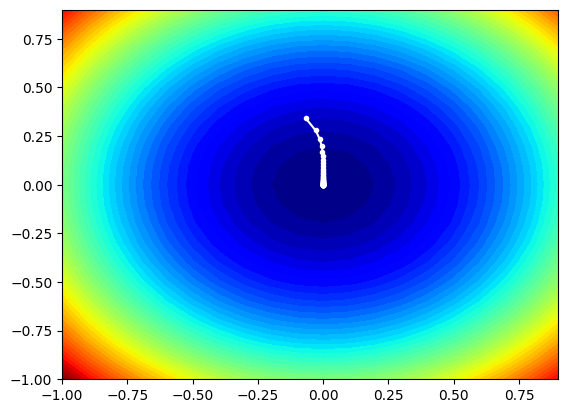

In [141]:
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')

solutions = asarray(solutions)
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')

# 3. RMProp optimizer (Root Mean Squared Propagation)

In [151]:
def objective(x, y):
    return x**2.0 + y**2.0

In [157]:
def derivative(x, y):
    return asarray([x * 2.0, y * 2.0])

In [164]:
def rmsprop(objective, derivative, bounds, n_iter, step_size, rho):
    solutions = list()
    # generate an initial point
    solution = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # list of the average square gradients for each variable
    sq_grad_avg = [0.0 for _ in range(bounds.shape[0])]
    
    # run the gradient descent
    for it in range(n_iter):
        # calculate gradient
        gradient = derivative(solution[0], solution[1])
        # update the average of the squared partial derivatives
        for i in range(gradient.shape[0]):
            # calculate the squared gradient
            sg = gradient[i]**2.0
            # update the moving average of the squared gradient
            sq_grad_avg[i] = (sq_grad_avg[i] * rho) + (sg * (1.0 - rho))
    
        # build a solution one variable at a time
        new_solution = list()
        for i in range(solution.shape[0]):
            # calculate the step size for this variable
            alpha = step_size / (1e-8 + np.sqrt(sq_grad_avg[i]))
            # calculate the new position in this variable
            value = solution[i] - alpha * gradient[i]
            # store this variable
            new_solution.append(value)
    
        # evaluate candidate point
        solution = asarray(new_solution)
        solution_eval = objective(solution[0], solution[1])
        solutions.append(solution)
    
        # report progress
        print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
    return solutions

>0 f([-0.06595602  0.340649  ]) = 0.12039
>1 f([-0.02886236  0.27929536]) = 0.07884
>2 f([-0.01276125  0.23417693]) = 0.05500
>3 f([-0.00562466  0.19863849]) = 0.03949
>4 f([-0.00246486  0.16964301]) = 0.02878
>5 f([-0.00107332  0.145492  ]) = 0.02117
>6 f([-0.00046434  0.12511178]) = 0.01565
>7 f([-0.00019955  0.10776512]) = 0.01161
>8 f([-8.51860635e-05  9.29147925e-02]) = 0.00863
>9 f([-3.61188240e-05  8.01516212e-02]) = 0.00642
>10 f([-1.52095444e-05  6.91533161e-02]) = 0.00478
>11 f([-6.36034309e-06  5.96594573e-02]) = 0.00356
>12 f([-2.64113212e-06  5.14554696e-02]) = 0.00265
>13 f([-1.08894956e-06  4.43619097e-02]) = 0.00197
>14 f([-4.45754295e-07  3.82270235e-02]) = 0.00146
>15 f([-1.81140176e-07  3.29213925e-02]) = 0.00108
>16 f([-7.30678086e-08  2.83339599e-02]) = 0.00080
>17 f([-2.92542666e-08  2.43689933e-02]) = 0.00059
>18 f([-1.16242022e-08  2.09437034e-02]) = 0.00044
>19 f([-4.58359298e-09  1.79863337e-02]) = 0.00032
>20 f([-1.79339171e-09  1.54345976e-02]) = 0.00024
>21

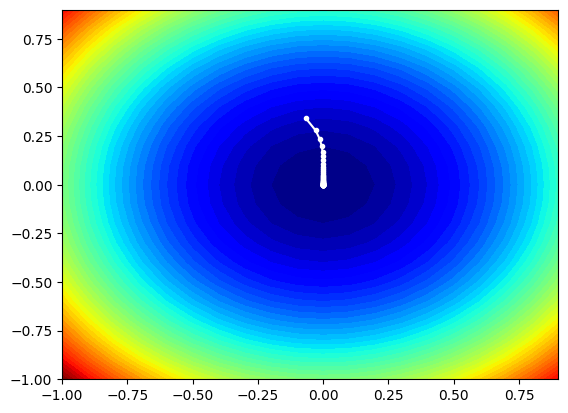

In [165]:
# seed the pseudo random number generator
np.random.seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 50
# define the step size
step_size = 0.01
# momentum for rmsprop
rho = 0.99
# perform the gradient descent search with rmsprop
solutions = rmsprop(objective, derivative, bounds, n_iter, step_size, rho)
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample as black circles
solutions = asarray(solutions)
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
# show the plot
pyplot.show()

# 4. Adam optimizer

In [166]:
def objective(x, y):
    return x ** 2 + y ** 2

In [167]:
def derivative(x, y):
    return np.array([2 * x, 2 * y])

In [172]:
def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
    solutions = list()
    # generate an initial point
    x = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    score = objective(x[0], x[1])
    
    # initialize first and second moments
    m = [0.0 for _ in range(bounds.shape[0])]
    v = [0.0 for _ in range(bounds.shape[0])]

    for t in range(n_iter):
        gradient = derivative(x[0], x[1])
        for i in range(x.shape[0]):
            m[i] = beta1 * m[i] + (1 - beta1) * gradient[i]
            v[i] = beta2 * v[i] + (1 - beta2) * gradient[i] ** 2

            m_hat = m[i] / (1 - beta1**(t + 1))
            v_hat = v[i] / (1 - beta2**(t + 1))

            x[i] = x[i] - alpha * m_hat / (np.sqrt(v_hat) + 1e-8)
            
        # evaluate candidate point
        score = objective(x[0], x[1])
        solutions.append(x.copy())
            
        print('>%d f(%s) = %.5f' % (t, x, score))
        
    return solutions

In [175]:
# seed the pseudo random number generator
np.random.seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 60
# steps size
alpha = 0.02
# factor for average gradient
beta1 = 0.8
# factor for average squared gradient
beta2 = 0.999
# perform the gradient descent search with adam
solutions = adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2)

>0 f([-0.14595599  0.42064899]) = 0.19825
>1 f([-0.12613855  0.40070573]) = 0.17648
>2 f([-0.10665938  0.3808601 ]) = 0.15643
>3 f([-0.08770234  0.3611548 ]) = 0.13812
>4 f([-0.06947941  0.34163405]) = 0.12154
>5 f([-0.05222756  0.32234308]) = 0.10663
>6 f([-0.03620086  0.30332769]) = 0.09332
>7 f([-0.02165679  0.28463383]) = 0.08149
>8 f([-0.00883663  0.26630707]) = 0.07100
>9 f([0.00205801 0.24839209]) = 0.06170
>10 f([0.01088844 0.23093228]) = 0.05345
>11 f([0.01759677 0.2139692 ]) = 0.04609
>12 f([0.02221425 0.19754214]) = 0.03952
>13 f([0.02485859 0.18168769]) = 0.03363
>14 f([0.02572196 0.16643933]) = 0.02836
>15 f([0.02505339 0.15182705]) = 0.02368
>16 f([0.02313917 0.13787701]) = 0.01955
>17 f([0.02028406 0.12461125]) = 0.01594
>18 f([0.01679451 0.11204744]) = 0.01284
>19 f([0.01296436 0.10019867]) = 0.01021
>20 f([0.00906264 0.08907337]) = 0.00802
>21 f([0.00532366 0.07867522]) = 0.00622
>22 f([0.00193919 0.06900318]) = 0.00477
>23 f([-0.00094677  0.06005154]) = 0.00361
>24 f(

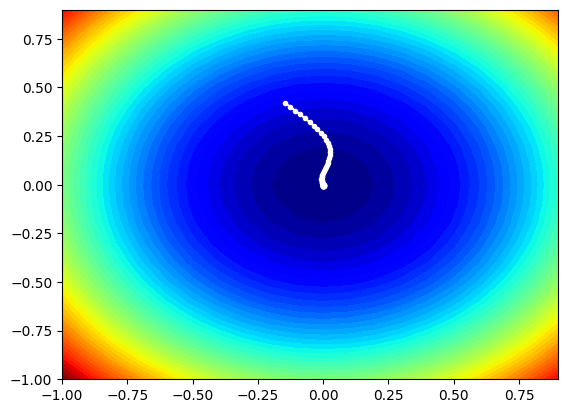

In [176]:
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample as black circles
solutions = asarray(solutions)
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
# show the plot
pyplot.show()